# Credit Card Fraud Detection

#### Data souce: 
Kaggle - Credit Card Fraud Detection

https://www.kaggle.com/dalpozz/creditcardfraud

#### Description:
The dataset is credit card transactions by European cardholders in September 2013. Two days of transactions are captured. Out of the 284,807 transactions, 492 are fraudulent. Actual variables of the dataset are not provided as they are confidential background information. The variables are replaced with numerical column names. 

The dataset are a result of PCA transformation. Additional variables included are time of transaction, amount, and class. Time and amount are self explanitory. The Class variable takes values 1: fraud and 0: normal.

#### Research Question

How accurately can the machine learning classifier - DecisionTreeClassifier - detech fraud credit card transactions?

#### Disclosure

This is an introductory approach to detecting fraud from credit card transactions using machine learning.

In [1]:
# Import libraries for data processing and viz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint

# Set seaborn color palette
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())


%matplotlib inline

In [2]:
# Import libraries for transformation and modeling
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

### Load dataset

In [3]:
# Load data into pandas dataframe and view first 5 instances
data = pd.read_csv('./creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Exploratory Data Analysis

In [4]:
# Describe dataframe
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


With no real column variables, it is difficult to interpret the accuracy of the data and determine any outliers at a glance.

One interesting metric from the statistical summary is the max in the amount column. 25k for a single transaction... seems high.

In [5]:
data.shape

(284807, 31)

Are there any null instances?

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No null values.

Although already disclosed in the description of the dataset, let's see the distribution of normal and fraud transactions

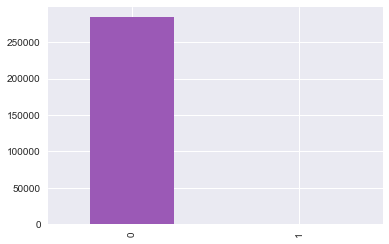

In [7]:
# Count values for each class and plot as a bar chart
data['Class'].value_counts().plot(kind='bar')

We have significantly more normal transactions than fraud transactions - which is expected. We will need to resample our data because the current dataset is imbalanced. We can balance the data either by oversampling or undersamping. By oversampling, we would essentially create additional fraud instances until the sample is balanced. Undersampling would require us to collect a sample of normal transactions to balance against the number of fraud transactions in the dataset. We will continue exploring the data for now.

Let's separate the fraud and normal transactions for further exploration.

In [8]:
# make a copy of each type of transaction
fraud = data[data['Class']==1].copy()
normal = data[data['Class']==0].copy()

print('There are {0} fraud transactions and {1} normal transactions.'.format(len(fraud), len(normal)))
print('Fraud transactions make up {:.2f}% of all transactions'.format((len(fraud)/len(normal))*100))

There are 492 fraud transactions and 284315 normal transactions.
Fraud transactions make up 0.17% of all transactions


Let's go back to that $25k transaction that we saw earlier. How much are normally charged in fraud transactions?

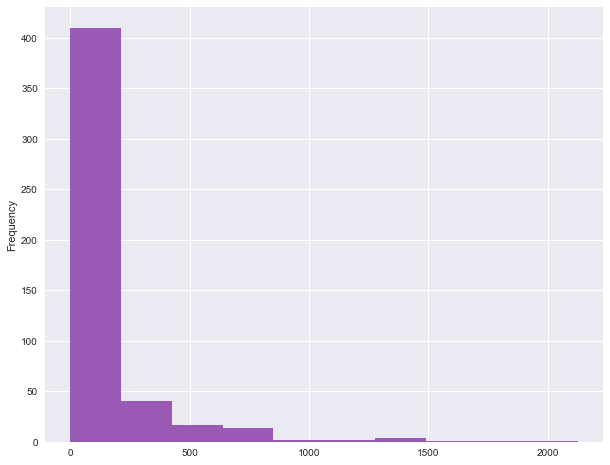

In [9]:
# fraud transaction amounts
fraud['Amount'].plot(kind='hist', figsize=(10,8))

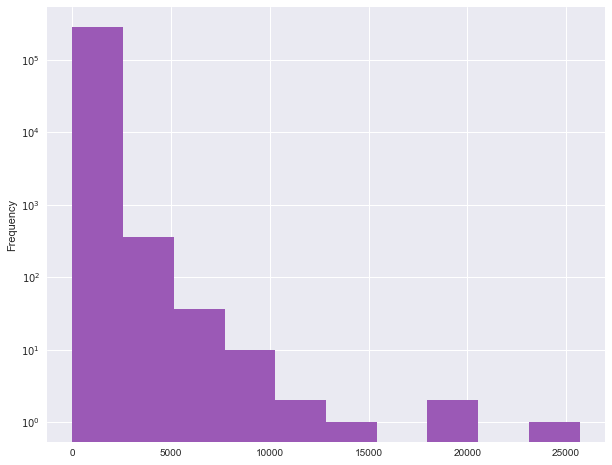

In [10]:
# normal transaction amounts. given the size of the y scale, the hist /
# will be plotted in log scale
normal['Amount'].plot(kind='hist', figsize=(10,8), logy=True)

let's see them on the same x (amount) scale

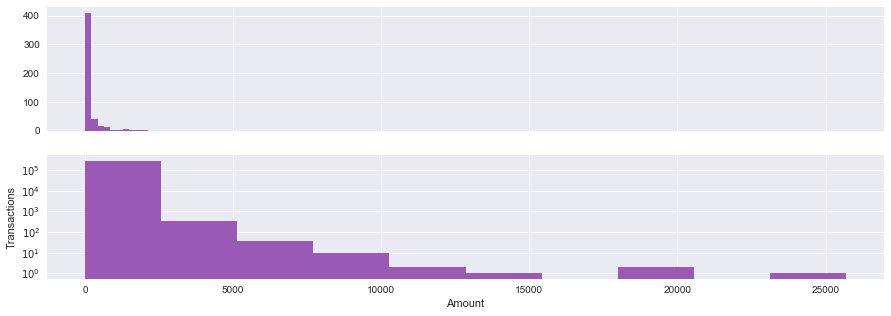

In [11]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(15,5)) # create two axes that will share the x axis
ax1.hist(fraud['Amount'])
ax2.hist(normal['Amount'])
plt.yscale('log') # graph the normal transaction on a log scale due to its spread
plt.xlabel('Amount')
plt.ylabel('Transactions')

The 25k transaction was a normal transaction after all. In fact, most fraudulent transactions do not exceed 2k.

Are there specific times when fraud transactions occur?

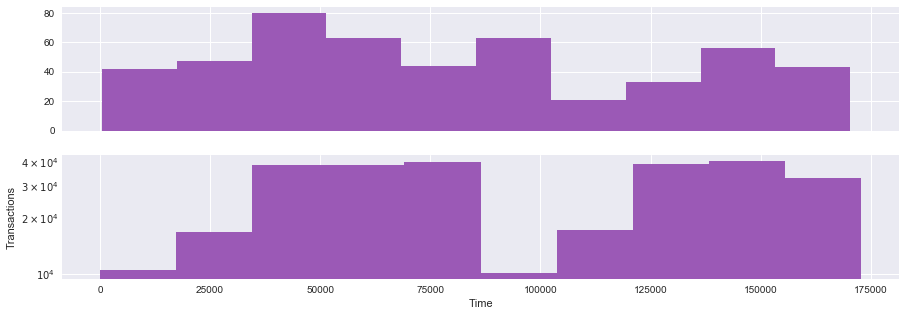

In [12]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(15,5))
ax1.hist(fraud['Time'])
ax2.hist(normal['Time'])
plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('Transactions')

It seems that there is a higher concentration of fraudulent transaction during off hours.

Are there correlations between the variables for normal and fraud transactions?

Let's take a look at the correlation of a few variables via scatter plots.

In [13]:
def scatter_rand(df=None, rows = None, cols=None, fig_size=None, rand_s=None, rand_e=None):
    """
    Return scatterplots based on specifications
    
    Parameters
    ----------
    df : pandas dataframe, default None
        pandas dataframe for scatter plot generation
    
    rows : int, default None
        specify number of rows of subplot grid
        
    cols : int, default None
        specify number of cols of subplot grid
        
    fig_size : set, default None
        specify set with figure length and width
        
    rand_s : int, default None
        start int of column index
    
    rand_e : int, default None
        end int of column index
    
    ----------    
    """
    # create figure and axes variable. allow specification of number of rows /
    # and columns of figure. figure size can we adjusted as well
    fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=fig_size)
    # loop through each row and column of figure and create scatter plot
    for i in range(rows):
        for x in range(cols):
            col1 = df.columns[randint(rand_s, rand_e)] # randomly select a column
            col2 = df.columns[randint(rand_s, rand_e)]
            v1 = df[col1]
            v2 = df[col2]
            corrcoef = round(v1.corr(v2),2) # calculate linear correlation
            axarr[i,x].scatter(v1, v2)
            # identify the variables displayed and its linear correlation
            axarr[i,x].set_title('{0} vs {1}, corr={2}'.format(col1, col2, corrcoef))

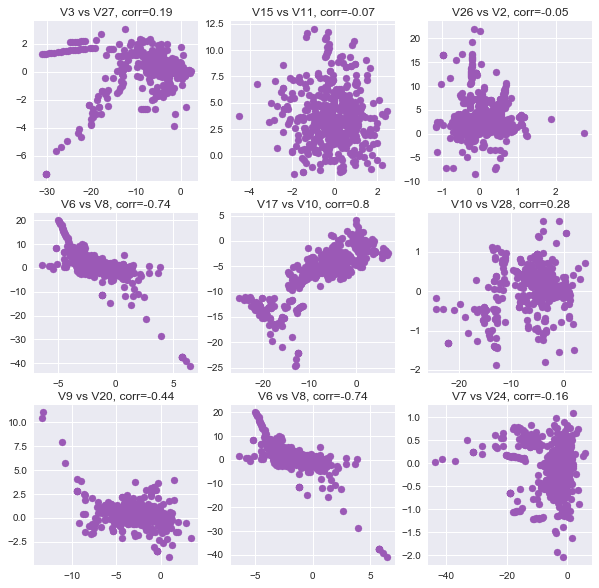

In [14]:
scatter_rand(df=fraud, rows=3, cols=3, fig_size=(10,10), rand_s=1, rand_e=28)

Running the above function a few times, there does seem to be some correlation between the variables. Let's take a look at the normal.

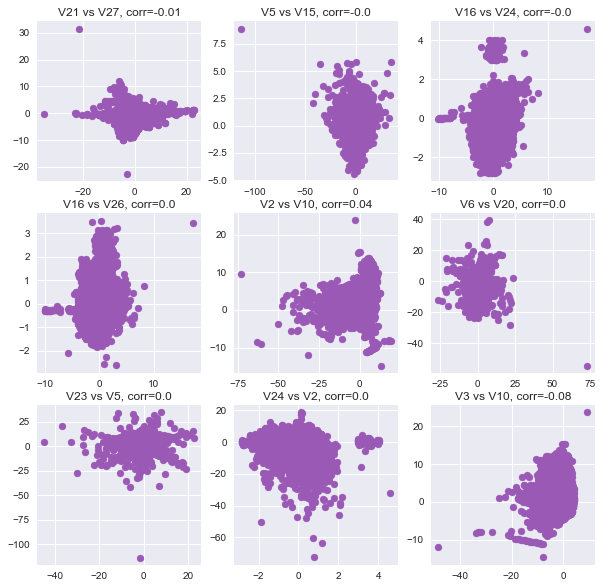

In [15]:
scatter_rand(df=normal, rows=3, cols=3, fig_size=(10,10), rand_s=1, rand_e=28)

There does not seem ot be a linear correlation between the variables of the normal transaction. However, almost all the transactions are clustered together.

Let's create a heatmap of correlations between variables using seaborn's heatmap.

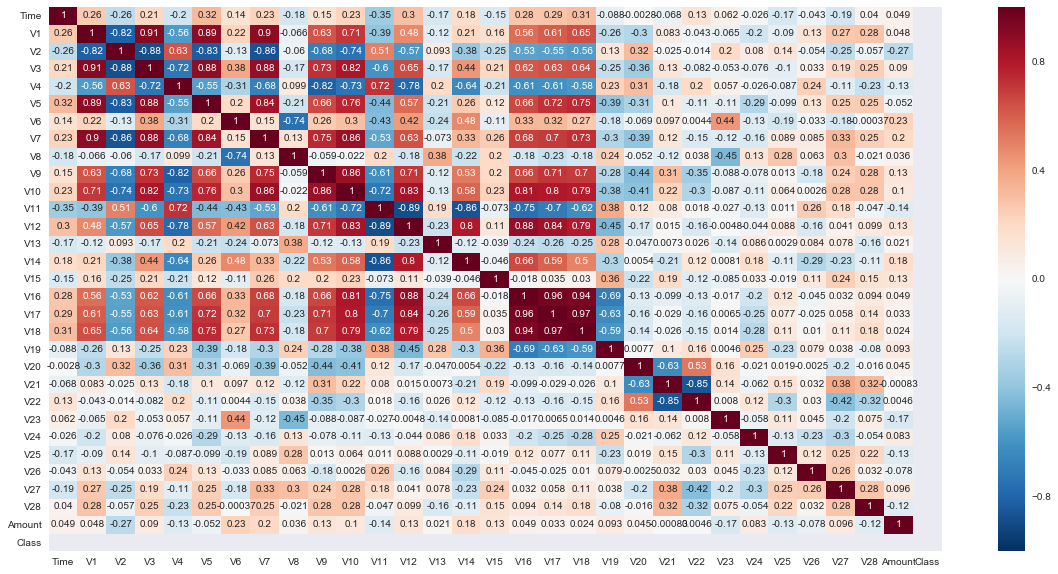

In [18]:
# Heatmap of corr for fraud transactions
fraud_corr = data[data['Class']==1].corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data=fraud_corr, annot=True)

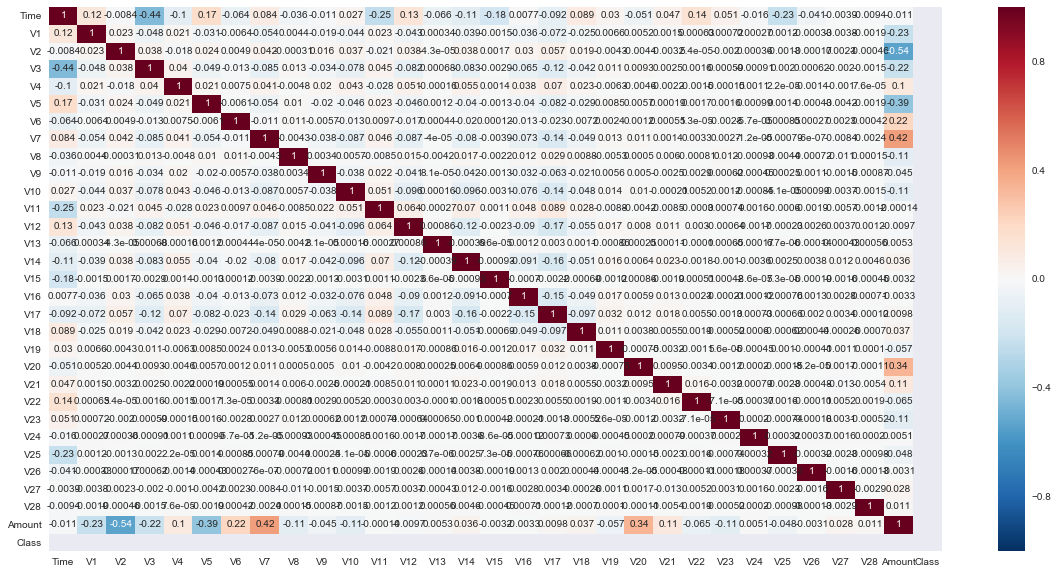

In [19]:
# Heatmap of corr for normal transactions
fraud_corr = data[data['Class']==0].corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data=fraud_corr, annot=True)

We may not know what the numerical variables represent but there appears to be high correlations in the first 18 variables of the fraudulent transactions. As we have seen with the scatter plots, the normal transactions may not have strong correlations between variables but they are tightly clustered together.

### Resampling and transforming

As we discovered earlier, the time variable may be helpful in determining if a transaction is fraud based on the time of day that the transaction occurred. There are higher concentration of fraud transactions during off hours, when majority of users are asleep.

We will normalize the seconds from a certain time, we're assuming is midnight of start date, to time of day to be between 0-1.

In [20]:
def normalize_seconds(times=None):
    """
    Convert seconds to time of day between 0-1
    This assumes that times is in seconds and seconds from 0 hour.
    """
    t = (times/86400)%1
    return t

In [21]:
# create copy of data for manipulation
data_wp = data.copy()

In [22]:
# normalize Time
data_wp['norm_time'] = normalize_seconds(data_wp.Time)

Similarly, the Amount column needs to be normalized. We will use the standard scaler function from sklearn. 

In [23]:
# normalize Amount
data_wp['norm_amount'] = StandardScaler().fit_transform(data_wp['Amount'].values.reshape(-1,1))

As we have seen before, the data is imbalanced with the number of normal transaction significantly higher than fraud transactions. Between oversampling and undersampling, we will undersample for our models because it does not require us to create additional fraudulent data points. In addition to testing our models with a 50%/50% fraud and normal split, we should test with datasets where normal transactions outnumber fraud. In real life, this will be the case.

In [24]:
# create a function that will create a dataset with 50/50 fraud /
# and normal transaction split as well any other combination
def sample_dataset(fraud_data=None, normal_data=None, pct_fraud=None):
    """
    Parameters
    ----------
    fraud_data : dataframe, default None
        dataframe containing fraud transactions
    normal_data : dataframe, default None
        dataframe containing normal transactions
    pct_fraud : int, default None
        specify percent that fraud transactions should make up of sample
    
    ----------
    """
    
    num_fraud = len(fraud) # number of fraud transactions based on fraud dataframe created during EDA
    num_normal = int(num_fraud/(pct_fraud/100))-num_fraud # number of normal transactions in sampled based on pct_normal
    normal_sample = normal_data.sample(n=num_normal, replace=False, random_state=1) # select sample from normal dataset
    df = pd.concat([fraud_data,normal_sample]) # combine fraud and normal dataset
    return df

In [25]:
# split the variable and target data
def split_var_tar(df=None):
    df_X = df.iloc[:,1:len(df.columns.values)-1]
    df_y = df['Class']
    return df_X, df_y

The actual resampling will occur in the modeling phase.

In [26]:
# drop Time and Amount variables as we already have normalized values
data_wp.drop(['Time', 'Amount'],axis=1, inplace=True)

In [27]:
# reindex columns to move Class column to the end of df
cols = [x for x in data_wp.columns.values if x!='Class']
cols.append('Class')
data_wp = data_wp.reindex_axis(cols, axis=1)

In [28]:
# split normalized data between fraud and normal
fraud = data_wp[data_wp['Class']==1].copy()
normal = data_wp[data_wp['Class']==0].copy()

### Modeling

For this specific research question, we are focusing on the supervised machine learning classifier, DecisionTreeClassifier. There are many other algorithms that can tackle this problem, including KNN and SVM.

In [29]:
# function that performs classification x times
# accuracy = correct/total instances
# recall= TP / TP+NP
# TP = fraud transactions classified as fraud
# NP = fraud transactions classified as normal
def model_scores(classification=None, X_train=None, y_train=None, X_test=None,
                     y_test=None, n_times=None):
    """
    Perform classification n_times and average the accuracy score
    
    Parameters
    ----------
    classification : function, default None
        specify ML Classification
    n_times : int, default None
        specify how many times to perform and avg class
    ----------
    """
    acc_score = []
    cm = []
    for n in range(1,n_times+1):
        clf = classification
        clf = clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc_score.append(accuracy_score(y_test, pred)*100)
        cm.append(confusion_matrix(y_test, pred))
    TP = [x[1,1] for x in cm]
    FN = [x[1,0] for x in cm]
    w_avg_recall = (sum(TP)/(sum(TP)+sum(FN)))*100
    print('Classification Details')
    print('------------------------------')
    print('Iterations: {}'.format(n_times))
    print('------------------------------')
    print('\n')
    print('Accuracy Score')
    print('------------------------------')
    print('Minimum Score: {:.2f}%'.format(np.min(acc_score)))
    print('Maximum Score: {:.2f}%'.format(np.max(acc_score)))
    print('Mean Score: {:.2f}%'.format(np.mean(acc_score)))
    print('------------------------------')
    print('\n')
    print('Confusion Matrix')
    print('------------------------------')
    print('Weighted average recall: {:.2f}%'.format(w_avg_recall))
    print('------------------------------')
    print('\n')
    

In [30]:
# create sample dataset with 50/50 balance between fraud and normal transactions
sample_X, sample_y = split_var_tar(sample_dataset(fraud_data=fraud, normal_data=normal, pct_fraud=50))

In [31]:
# split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(sample_X, sample_y, test_size=0.3, random_state=1)

In [32]:
model_scores(DecisionTreeClassifier(), X_train, y_train, X_test, y_test, 5)

Classification Details
------------------------------
Iterations: 5
------------------------------


Accuracy Score
------------------------------
Minimum Score: 88.85%
Maximum Score: 91.55%
Mean Score: 90.27%
------------------------------


Confusion Matrix
------------------------------
Weighted average recall: 90.70%
------------------------------




Default settings on the DecisionTreeClassifier yeild an average accuracy of 90% with dataset of 50/50 split between fraud and normal transactions.

Will the accuracy and recall improve if we eliminate the columns that are not correlated with other columns?
e.g. V18-26

In [33]:
# drop columns function
def drop_cols(df=None, drop_cols=None):
    """
    Return dataframe with eliminated columns
    
    Parameters
    ----------
    drop_cols : list, default None
        list of columns to be dropped from dataframe
    
    ----------
    """
    new_cols = [x for x in df.columns.values if not x in drop_cols]
    df = df.loc[:,new_cols]
    return df

In [34]:
# columns to be dropped
elim_cols = ['V'+str(x) for x in range(18,29)]

In [35]:
fraud_w_elim = drop_cols(fraud, elim_cols)

In [36]:
normal_w_elim = drop_cols(normal, elim_cols)

In [37]:
sample_X, sample_y = split_var_tar(sample_dataset(fraud_data=fraud_w_elim, normal_data=normal_w_elim, pct_fraud=50))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(sample_X, sample_y, test_size=0.3, random_state=1)

In [39]:
model_scores(DecisionTreeClassifier(), X_train, y_train, X_test, y_test, 5)

Classification Details
------------------------------
Iterations: 5
------------------------------


Accuracy Score
------------------------------
Minimum Score: 90.54%
Maximum Score: 92.23%
Mean Score: 91.28%
------------------------------


Confusion Matrix
------------------------------
Weighted average recall: 91.55%
------------------------------




By removing additional noise from V18-28, we see a slightly improvement in accuracy and recall.

Let's see how this may change when the discrepency between fraud and normal transactions are greater.

In [40]:
fraud_splits = [50, 40, 30, 20, 10, 5]

In [41]:
for x in fraud_splits:
    sample_X, sample_y = split_var_tar(sample_dataset(fraud_data=fraud_w_elim, normal_data=normal_w_elim, pct_fraud=x))
    X_train, X_test, y_train, y_test = train_test_split(sample_X, sample_y, test_size=0.3, random_state=1)
    print('percent fraud: {}%'.format(x))
    model_scores(DecisionTreeClassifier(), X_train, y_train, X_test, y_test, 5)

percent fraud: 50%
Classification Details
------------------------------
Iterations: 5
------------------------------


Accuracy Score
------------------------------
Minimum Score: 91.22%
Maximum Score: 93.24%
Mean Score: 91.96%
------------------------------


Confusion Matrix
------------------------------
Weighted average recall: 91.83%
------------------------------


percent fraud: 40%
Classification Details
------------------------------
Iterations: 5
------------------------------


Accuracy Score
------------------------------
Minimum Score: 88.89%
Maximum Score: 89.70%
Mean Score: 89.27%
------------------------------


Confusion Matrix
------------------------------
Weighted average recall: 89.93%
------------------------------


percent fraud: 30%
Classification Details
------------------------------
Iterations: 5
------------------------------


Accuracy Score
------------------------------
Minimum Score: 90.65%
Maximum Score: 91.46%
Mean Score: 90.85%
---------------------

As the percent of fraud transactions within the dataset decrease, the DecisionTreeClassifier becomes more accurate. With that being said, the increase is most likely due to the increase in number of normal transactions. With each increase in the percent of normal transactions, recall decreases.

let's see how a model will perform on the entire dataset trained with 1% fraud data in dataset. 

The reason for this choice is because in the real world, fraud transactions consist of less than 1% of transactions.

In [42]:
# full dataset with eliminated columns
data_wp_w_elim = drop_cols(data_wp, elim_cols)
X, y = split_var_tar(data_wp_w_elim)

In [43]:
# creating model with training dataset that has 1% fraud data
sample_X, sample_y = split_var_tar(sample_dataset(fraud_data=fraud_w_elim, normal_data=normal_w_elim, pct_fraud=1))
X_train, X_test, y_train, y_test = train_test_split(sample_X, sample_y, test_size=0.3, random_state=1)

In [44]:
model_scores(DecisionTreeClassifier(), X_train, y_train, X, y, 5)

Classification Details
------------------------------
Iterations: 5
------------------------------


Accuracy Score
------------------------------
Minimum Score: 99.80%
Maximum Score: 99.81%
Mean Score: 99.80%
------------------------------


Confusion Matrix
------------------------------
Weighted average recall: 94.67%
------------------------------




How does that compare to a model trained with a sample dataset that contains 50% fraud transactions?

In [45]:
# creating model with training dataset that has 50% fraud data
sample_X, sample_y = split_var_tar(sample_dataset(fraud_data=fraud_w_elim, normal_data=normal_w_elim, pct_fraud=50))
X_train, X_test, y_train, y_test = train_test_split(sample_X, sample_y, test_size=0.3, random_state=1)

In [46]:
model_scores(DecisionTreeClassifier(), X_train, y_train, X, y, 5)

Classification Details
------------------------------
Iterations: 5
------------------------------


Accuracy Score
------------------------------
Minimum Score: 89.28%
Maximum Score: 90.50%
Mean Score: 89.91%
------------------------------


Confusion Matrix
------------------------------
Weighted average recall: 97.56%
------------------------------




We see improvement in recall but accuracy decreased.

### Conclusion

Using the supervised machine learning algorithm, DecisionTreeClassifier, we were able to predict the classification of transactions with a high degree of accuracy and recall. 

Our model, built with a 1% fraud transaction sample, was able to accuracy classify 99% of the transactions and recall 95%. A model trained with 50% fraud transactions scored higher in recall with 97%, however, overall accuracy decreased. 

Depending on the purpose of this model, one would need to sacrifice recall for accuracy or vise versa.  

### Additional thoughts/remarks

The accuracy can be even higher with more manipulation to the algorithm's settings - for example, researching the max_depth of the tree to minimize overfitting. Furthermore, additional transformations can be made to the dataset and our initial conclusions. An example of a dataset transformation is the elimination of noise - consider excluding features that prove to be insignificant to the algorithm. In the current exercise, we removed columns that we thought may be causing noise, however, that was purely because there were no linear relationships between features - further research may prove that they are necessary. An example of an adjustment to inital findings that could improve the model's accuracy is dive deeper into understanding why the model could not achieve 100%.